### Content : 
### key question 3 : Price range grouping
### key question 5 : Loyalty Flag pie chart
### key question 6 : differences in ordering habits based on a customer’s loyalty status
### key question 8 : connection between age and family status in terms of ordering habits
#### Comapring Loyalty in differents family-status
#### Comapring Spending in differents family-status
### key question 9 : What different classifications does the demographic information suggest? family-status?
### key question 10 : Basic Statistics on family-status-Profile level for Usage Frequency and Expenditure



In [1]:
#Importing libraries
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import scipy

In [2]:
path = r'C:\Users\Bilel\Desktop\data_analyst_Carrer Foundry\Data Immersion\07-12-24 Instacart Basket Analysis'
df = pd.read_pickle(os.path.join(path,'02 Data','Prepared Data','orders_products_high-activity customer_departement_merged.pkl'))

## key question 3 : Price range grouping

In [3]:
# Display all columns on dataframe
pd.set_option('display.max_columns', None)

In [4]:
df.head()

,order_id,user_id,order_number,orders_day_of_week,order_hour_of_day,days_since_prior_order,new_customer,product_id,add_to_cart_order,reordered,product_name,aisle_id,department_id,prices,price_range_loc,busiest_day,Busiest_days,busiest_period_of_day,max_order,loyalty_flag,avg_prods_price,spending_flag,customer_frequency,order_frequency_flag,gender,state,age,date_joined,number_of_dependants,family_status,income,region,income_group,age_group,dependents_flag,department,_merge
0,2539329,1,1,2,8,NaN,True,196,1,0,Soda,77,7,9.0,Mid-range product,Regularly busy,Regular day,Average orders,10,New customer,6.367797,Low spender,20.5,Non_frequent customer,Female,Alabama,31,2/17/2019,3,married,40423,South,middle-income,adult,Has dependents,beverages,both
1,2539329,1,1,2,8,NaN,True,14084,2,0,Organic Unsweetened Vanilla Almond Milk,91,16,12.5,Mid-range product,Regularly busy,Regular day,Average orders,10,New customer,6.367797,Low spender,20.5,Non_frequent customer,Female,Alabama,31,2/17/2019,3,married,40423,South,middle-income,adult,Has dependents,dairy eggs,both
2,2539329,1,1,2,8,NaN,True,12427,3,0,Original Beef Jerky,23,19,4.4,Low-range product,Regularly busy,Regular day,Average orders,10,New customer,6.367797,Low spender,20.5,Non_frequent customer,Female,Alabama,31,2/17/2019,3,married,40423,South,middle-income,adult,Has dependents,snacks,both
3,2539329,1,1,2,8,NaN,True,26088,4,0,Aged White Cheddar Popcorn,23,19,4.7,Low-range product,Regularly busy,Regular day,Average orders,10,New customer,6.367797,Low spender,20.5,Non_frequent customer,Female,Alabama,31,2/17/2019,3,married,40423,South,middle-income,adult,Has dependents,snacks,both
4,2539329,1,1,2,8,NaN,True,26405,5,0,XL Pick-A-Size Paper Towel Rolls,54,17,1.0,Low-range product,Regularly busy,Regular day,Average orders,10,New customer,6.367797,Low spender,20.5,Non_frequent customer,Female,Alabama,31,2/17/2019,3,married,40423,South,middle-income,adult,Has dependents,household,both


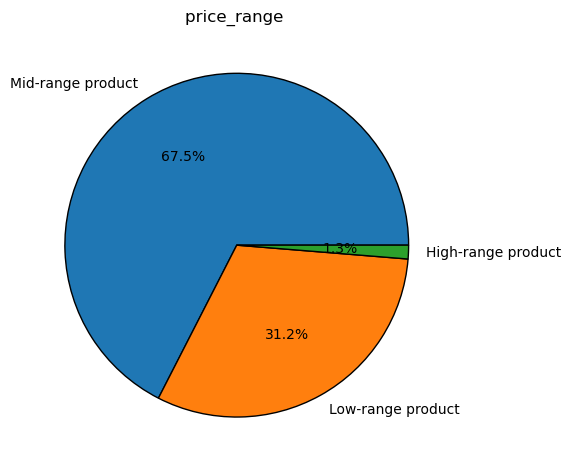

In [5]:
# price_range Visualization Pie Chart
price_range_counts = df['price_range_loc'].value_counts()
price_range_pie_chart=price_range_counts.plot.pie(autopct='%1.1f%%',wedgeprops={'edgecolor':'black'})
plt.title('price_range ')
plt.ylabel('')
plt.tight_layout()
plt.show()

In [6]:
# Export price_range pie Chart
price_range_pie_chart.figure.savefig(os.path.join(path,'04 Analysis','Visualizations','Task_4.10', 'pie_chart_price_range.png'))

## key question 5 : Loyalty Flag pie chart

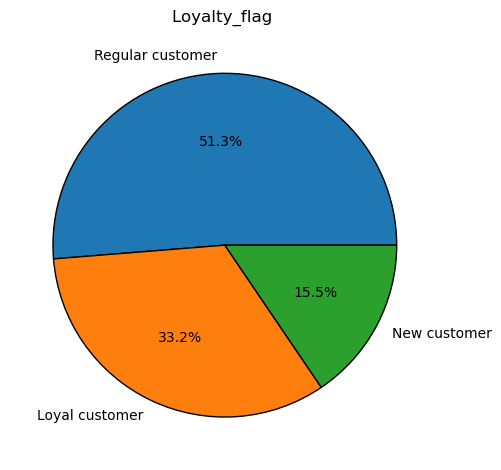

In [7]:
# Loyalty_flag  Pie Chart Visualization
loyalty_counts = df['loyalty_flag'].value_counts()
loyalty_pie_chart=loyalty_counts.plot.pie(autopct='%1.1f%%',wedgeprops={'edgecolor':'black'})
plt.title('Loyalty_flag ')
plt.ylabel('')
plt.tight_layout()
plt.show()

## key question 6 : differences in ordering habits based on a customer’s loyalty status

In [8]:
# crosstab loyalty_price_range
loyalty_price_range = pd.crosstab(df['loyalty_flag'],df['price_range_loc'],dropna = False)
loyalty_price_range

price_range_loc,High-range product,Low-range product,Mid-range product
loyalty_flag,,,
Loyal customer,119936,3214690,6949467
New customer,65927,1501288,3236480
Regular customer,212090,4958862,10705824


(array([0, 1, 2]),
 [Text(0, 0, 'Loyal customer'),
  Text(1, 0, 'New customer'),
  Text(2, 0, 'Regular customer')])

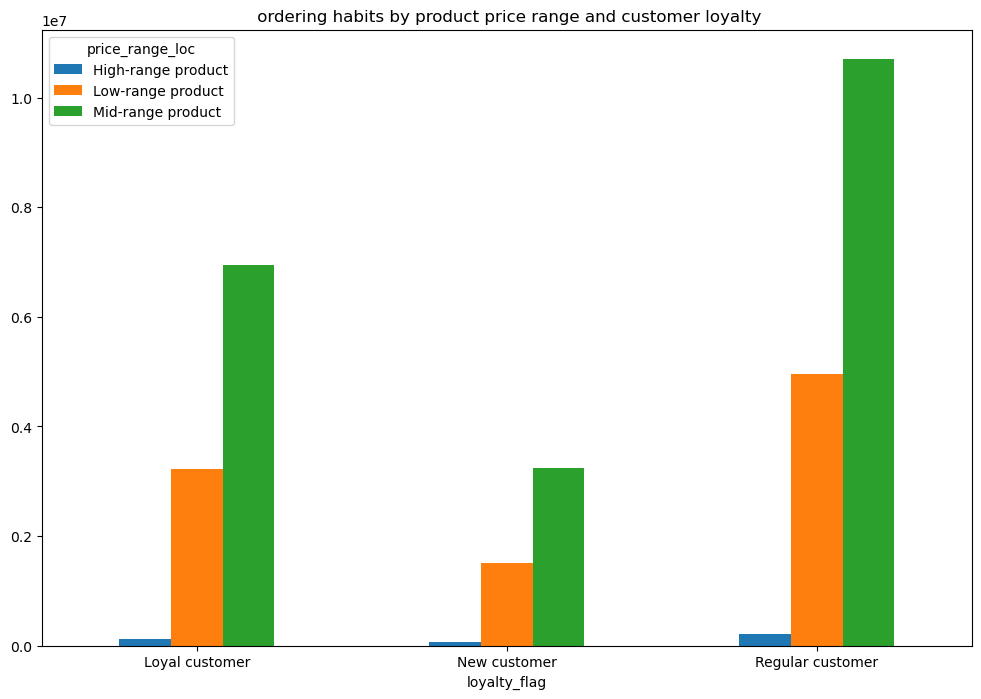

In [9]:
# bar chart 
bar_loyalty_price_range=loyalty_price_range.plot.bar( figsize=(12,8))
plt.title(' ordering habits by product price range and customer loyalty')
plt.xlabel('loyalty_flag')
plt.xticks(rotation=0)

In [10]:
#Exporting bar chart
bar_loyalty_price_range.figure.savefig(os.path.join(path,'04 Analysis','Visualizations','Task_4.10','ordering habits by product price range and customer loyalty.png'))

## key question 8 : connection between age and family status in terms of ordering habits

In [11]:
# crosstab age & family status
cross_age_family = pd.crosstab(df['age_group'],df['family_status'],dropna = False)
cross_age_family

family_status,divorced/widowed,living with parents and siblings,married,single
age_group,,,,
adult,0,0,6901266,2313185
middle-aged,623313,0,7238740,1827998
senior,2021958,0,6173586,0
young adult,0,1481172,1430119,953227


(array([0, 1, 2, 3]),
 [Text(0, 0, 'adult'),
  Text(1, 0, 'middle-aged'),
  Text(2, 0, 'senior'),
  Text(3, 0, 'young adult')])

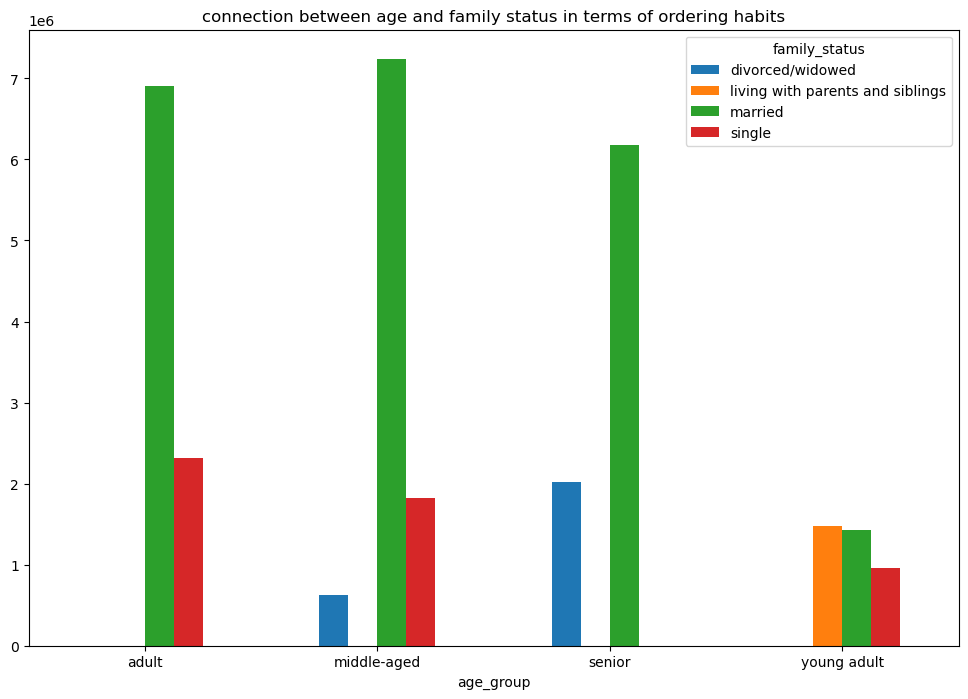

In [12]:
bar_age_family=cross_age_family.plot.bar( figsize=(12,8))
plt.title('connection between age and family status in terms of ordering habits')
plt.xlabel('age_group')
plt.xticks(rotation=0)

### Comapring Loyalty in differents family-status

In [13]:
# Crosstab loyalty vs  family-status
cross_loyalty_family= pd.crosstab(df ['loyalty_flag'], df ['family_status'],dropna=False)
cross_loyalty_family

family_status,divorced/widowed,living with parents and siblings,married,single
loyalty_flag,,,,
Loyal customer,882722,492749,7202500,1706122
New customer,403781,221779,3380651,797484
Regular customer,1358768,766644,11160560,2590804


(array([0, 1, 2]),
 [Text(0, 0, 'Loyal customer'),
  Text(1, 0, 'New customer'),
  Text(2, 0, 'Regular customer')])

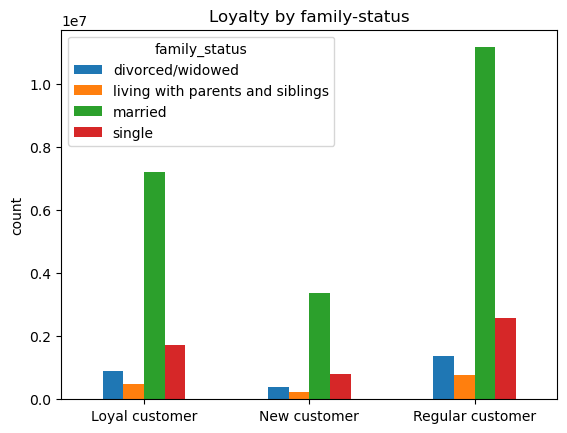

In [14]:
# bar chart loyalty vs family-status
bar_loyalty_family = cross_loyalty_family.plot.bar()
plt.title('Loyalty by family-status')
plt.xlabel('')
plt.ylabel('count')
plt.xticks(rotation=0)

### Comapring Spending in differents family-status

In [15]:
# Crosstab Spending vs  family-status
cross_Spending_family= pd.crosstab(df ['spending_flag'], df ['family_status'],dropna=False)
cross_Spending_family

family_status,divorced/widowed,living with parents and siblings,married,single
spending_flag,,,,
High spender,50321,27926,429457,95721
Low spender,2594950,1453246,21314254,4998689


(array([0, 1]), [Text(0, 0, 'High spender'), Text(1, 0, 'Low spender')])

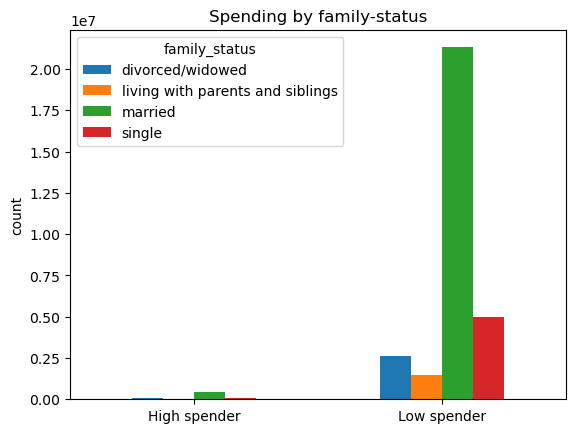

In [16]:
# bar chart Spending vs family-status
bar_Spending_family = cross_Spending_family.plot.bar()
plt.title('Spending by family-status')
plt.xlabel('')
plt.ylabel('count')
plt.xticks(rotation=0)

## key question 9 : What different classifications does the demographic information suggest? family-status?

In [17]:
family_status_counts = df['family_status'].value_counts(dropna = False)
family_status_counts

family_status
married                             21743711
single                               5094410
divorced/widowed                     2645271
living with parents and siblings     1481172
Name: count, dtype: int64

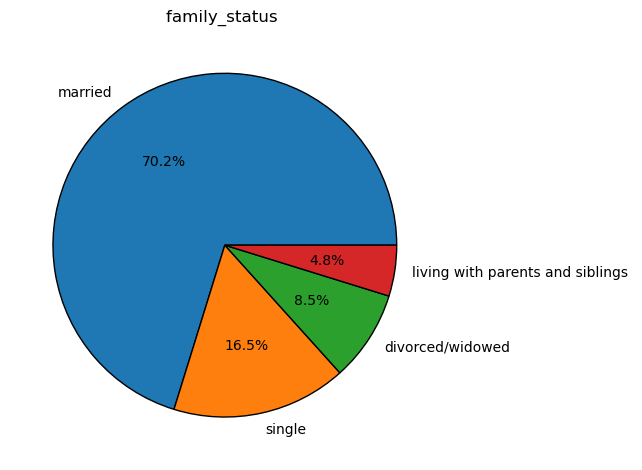

In [18]:
# family_status Profile  Pie Chart Visualization
family_status_pie_chart=family_status_counts.plot.pie(autopct='%1.1f%%', labels= ['married', 'single','divorced/widowed','living with parents and siblings '],wedgeprops={'edgecolor':'black'})
plt.title('family_status ')
plt.ylabel('')
plt.tight_layout()
plt.show()

## key question 10 : Basic Statistics on family-status-Profile level for Usage Frequency and Expenditure

In [19]:
#  Create a subset of customer profile
customer_profile = df.groupby(['user_id','gender','state','region','loyalty_flag','spending_flag','age_group','income_group','family_status','dependents_flag','order_number','days_since_prior_order'])['prices'].sum().reset_index()

In [20]:
family_status_profile=customer_profile.groupby('family_status').agg({'days_since_prior_order':['mean','min','max'],'prices':['mean','min','max']}) 
family_status_profile

days_since_prior_order                prices  \
                                                   mean  min   max       mean   
family_status                                                                   
divorced/widowed                              10.352674  0.0  30.0  78.935329   
living with parents and siblings              10.301480  0.0  30.0  79.416970   
married                                       10.394093  0.0  30.0  78.681855   
single                                        10.391328  0.0  30.0  78.248188   

                                               
                                  min     max  
family_status                                  
divorced/widowed                  0.0   875.0  
living with parents and siblings  1.0   750.3  
married                           0.0  1092.2  
single                            0.0   712.0